# Example: phase_locking

https://brian2.readthedocs.io/en/stable/examples/phase_locking.html

In [1]:
import sys
#sys.path.append('/home/jovyan/brian2lava')
# sys.path.append('/home/carlo/Entwicklung/Python/brian2lava')
sys.path.append('/home/francesco/Developing/B2L/brian2lava')

In [2]:
from brian2 import *

# Import Brian2Lava
import brian2lava

# Set device
# set_device('lava', hardware='CPU', debug=True)

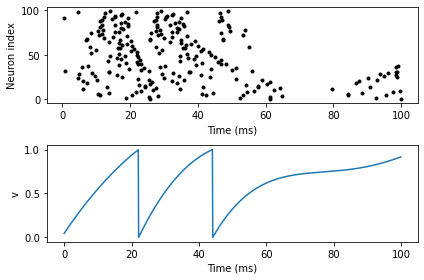

In [3]:
tau = 20*ms
n = 100
b = 1.2 # constant current mean, the modulation varies
freq = 10*Hz

eqs = '''
dv/dt = (-v + a * sin(2 * pi * freq * t) + b) / tau : 1
a : 1
'''
neurons = NeuronGroup(n, model=eqs, threshold='v > 1', reset='v = 0',
                      method='euler')
neurons.v = 'rand()'
neurons.a = '0.05 + 0.7*i/n'
S = SpikeMonitor(neurons)
trace = StateMonitor(neurons, 'v', record=50)

run(100*ms)
subplot(211)
plot(S.t/ms, S.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(212)
plot(trace.t/ms, trace.v.T)
xlabel('Time (ms)')
ylabel('v')
tight_layout()
show()